In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,10)
# ylim=(-3, 3)
alpha=1
marker='.'
s=1
legend=True
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (50,50)

In [3]:
def barplot_repeats(df, name):
    ax = sns.barplot(
        x="id", 
        y=f"logFC{name}", 
        data=df[~df["id"].str.startswith("WBGene")]
    )
    # ax.set_xlabel('Performance')
    plt.xticks(rotation=90)

# paths

In [4]:
repeats_ucsc_path = "../../00_annotation/results/annotation/ce_11_repeats.filtered.tsv"

In [5]:
dpf3_null_rep_name_path = "../../02_total_RNAseq_15_C/results/filter_repeat_name_level/DE_htseq_count_alignment_unique_mappers_aggregate_counts_repeat_name_level__reverse__WT__Dpf_3_null/DE_edgeR/final_table_FDR_low.tsv"

In [6]:
mut_2_rep_name_path = "../../02_total_RNAseq_15_C/results/filter_repeat_name_level/DE_htseq_count_alignment_unique_mappers_aggregate_counts_repeat_name_level__reverse__WT__mut_2/DE_edgeR/final_table_FDR_low.tsv"

In [7]:
mut_7_rep_name_path = "../../02_total_RNAseq_15_C/results/filter_repeat_name_level/DE_htseq_count_alignment_unique_mappers_aggregate_counts_repeat_name_level__reverse__WT__mut_7/DE_edgeR/final_table_FDR_low.tsv"

# annotation

In [8]:
repeats_ucsc = pd.read_csv(repeats_ucsc_path, header=0, sep="\t")

In [9]:
repeats_ucsc["repClass"].value_counts()

DNA          33579
Unknown       9070
Satellite     5444
RC            4551
DNA?           755
LTR            673
LINE           654
SINE           531
ARTEFACT         2
Name: repClass, dtype: int64

In [10]:
repeats_ucsc["repFamily"].value_counts()

DNA              16140
Unknown           9070
Satellite         5444
Helitron          4551
PiggyBac?         4316
hAT               3842
TcMar-Tc1?        2442
TcMar-Tc1         2115
TcMar-Pogo        1860
MULE-MuDR         1215
DNA?               755
CR1                478
Pao                465
tRNA-RTE           463
TcMar-Tc4          460
TcMar-Mariner      298
TcMar-Tc4?         206
TcMar-Tc2          201
Gypsy              170
CMC-Chapaev?       152
CMC-Chapaev        137
RTE                 98
CMC-Mirage          95
hAT?                71
R2?                 64
R2                  40
Jockey              38
LTR                 38
PIF-Harbinger       16
Merlin               9
tRNA-Deu-L2          4
MULE-MuDR?           4
ARTEFACT             2
Name: repFamily, dtype: int64

In [11]:
repeats_ucsc["repName"].value_counts()

MINISAT1_CE       3455
CELE2             3158
CERP3             2915
CELE14B           2451
LR9A              2150
CELE46A           2102
CELE1             1709
HAT1_CE           1659
CERP16            1579
PALTTAA3_CE       1490
HelitronY1A_CE    1468
PALTA5_CE         1434
CeRep5            1324
PALTTAA1_CE       1272
PALTTAA2_CE       1224
CELE46B           1136
CELE42             963
CELE7              869
PALTTTAAA2         845
CELE4              831
HelitronY1_CE      802
HelitronY4_CE      780
CELE11             766
RC123              700
Helitron2_CE       624
CELE14A            624
TIR9TA1B_CE        585
CeRep4             528
PALTTTAAA1         521
TIR9TA1C_CE        467
                  ... 
CeRep58             14
CER16-LTR_CE        13
CER17-I_CE          13
CER10-LTR_CE        12
CER15-1-LTR_CE      11
CER12-1-LTR_CE      10
CER3-I_CE           10
Merlin1m_CE          9
CER8-LTR_CE          9
CER6-I_CE            9
Mariner4_CE          8
CER10-I_CE           8
CER2-1-LTR_

In [12]:
repeats_ucsc_short = repeats_ucsc[["repName", "repClass", "repFamily"]].drop_duplicates()

In [13]:
repeats_ucsc_short.head()

,repName,repClass,repFamily
0,CELE2,DNA,DNA
1,CELE1,DNA,TcMar-Tc1?
3,CELE14B,DNA,DNA
4,PALTTAA3_CE,DNA,PiggyBac?
5,CERP3,Unknown,Unknown


In [14]:
len(repeats_ucsc_short)

181

In [15]:
repeats_ucsc_short.columns = ["id", "class", "family"]

In [16]:
repeats_ucsc_short.head()

,id,class,family
0,CELE2,DNA,DNA
1,CELE1,DNA,TcMar-Tc1?
3,CELE14B,DNA,DNA
4,PALTTAA3_CE,DNA,PiggyBac?
5,CERP3,Unknown,Unknown


# plots

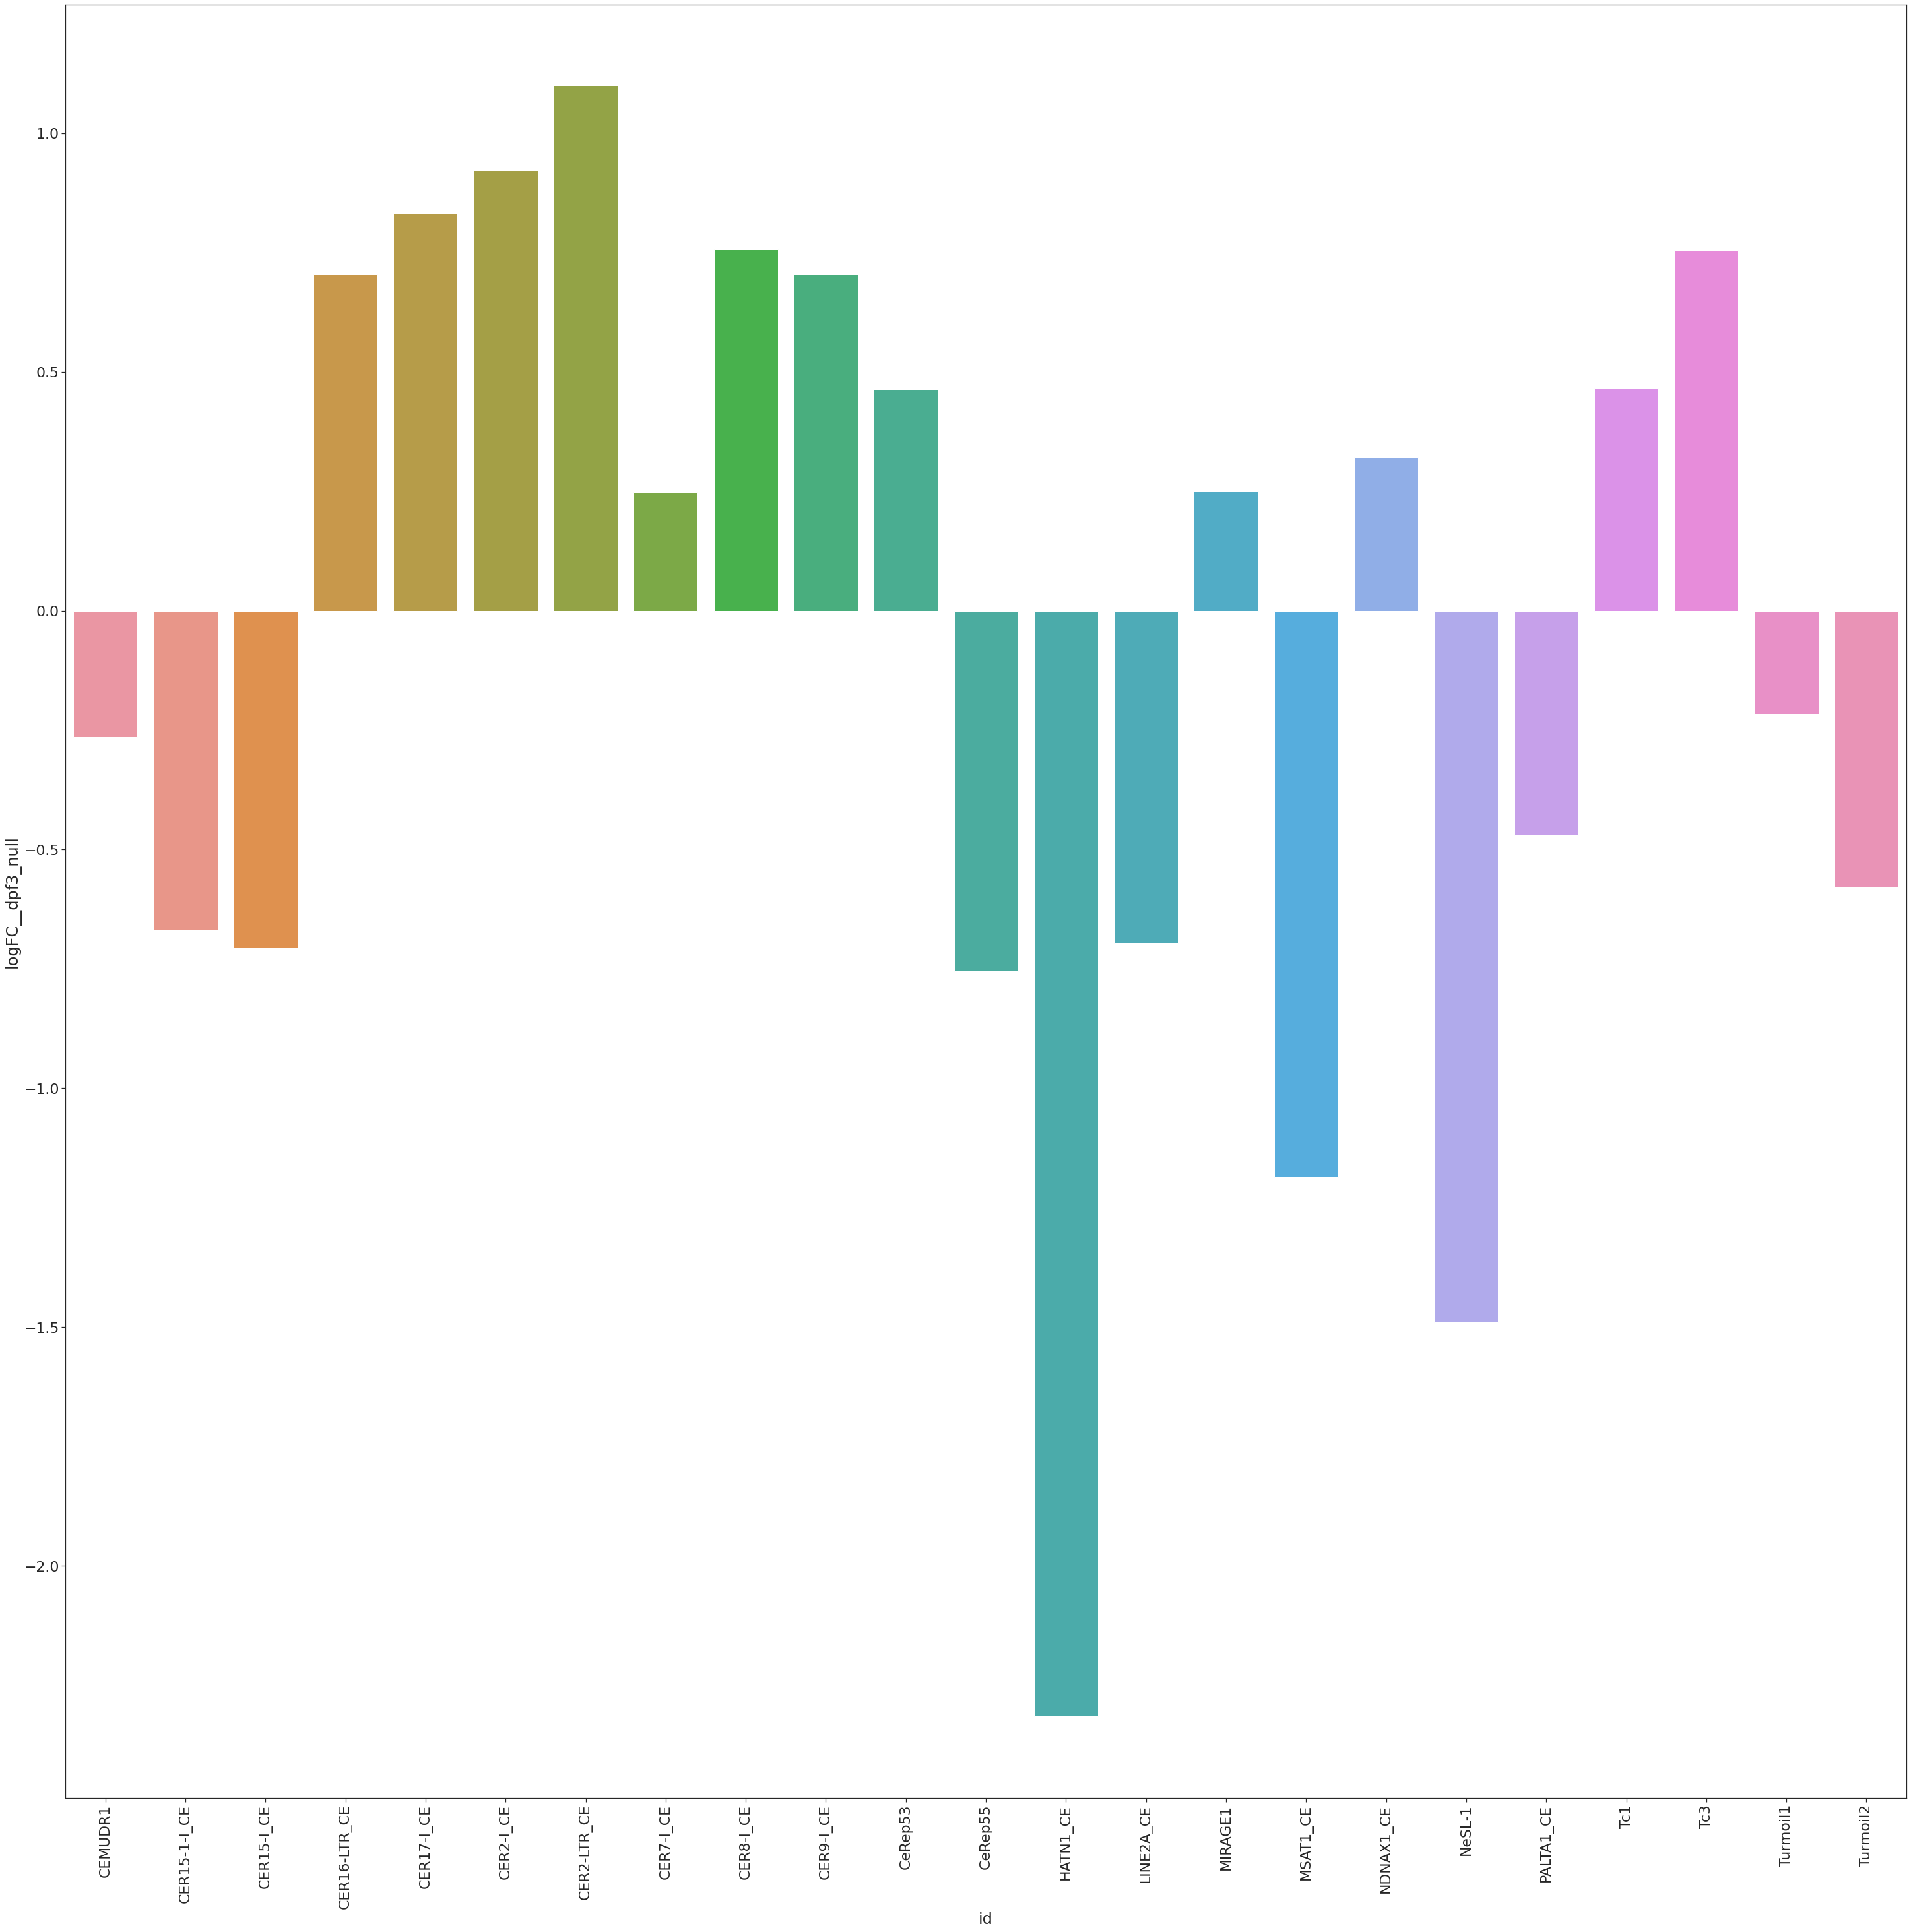

In [17]:
dpf3_null_rep_name = pd.read_csv(dpf3_null_rep_name_path, header=0, sep="\t")
dpf3_null_rep_name.set_index("id", inplace=True)
dpf3_null_rep_name.columns = dpf3_null_rep_name.columns + "__dpf3_null"
dpf3_null_rep_name.reset_index(inplace=True)
barplot_repeats(dpf3_null_rep_name, "__dpf3_null")

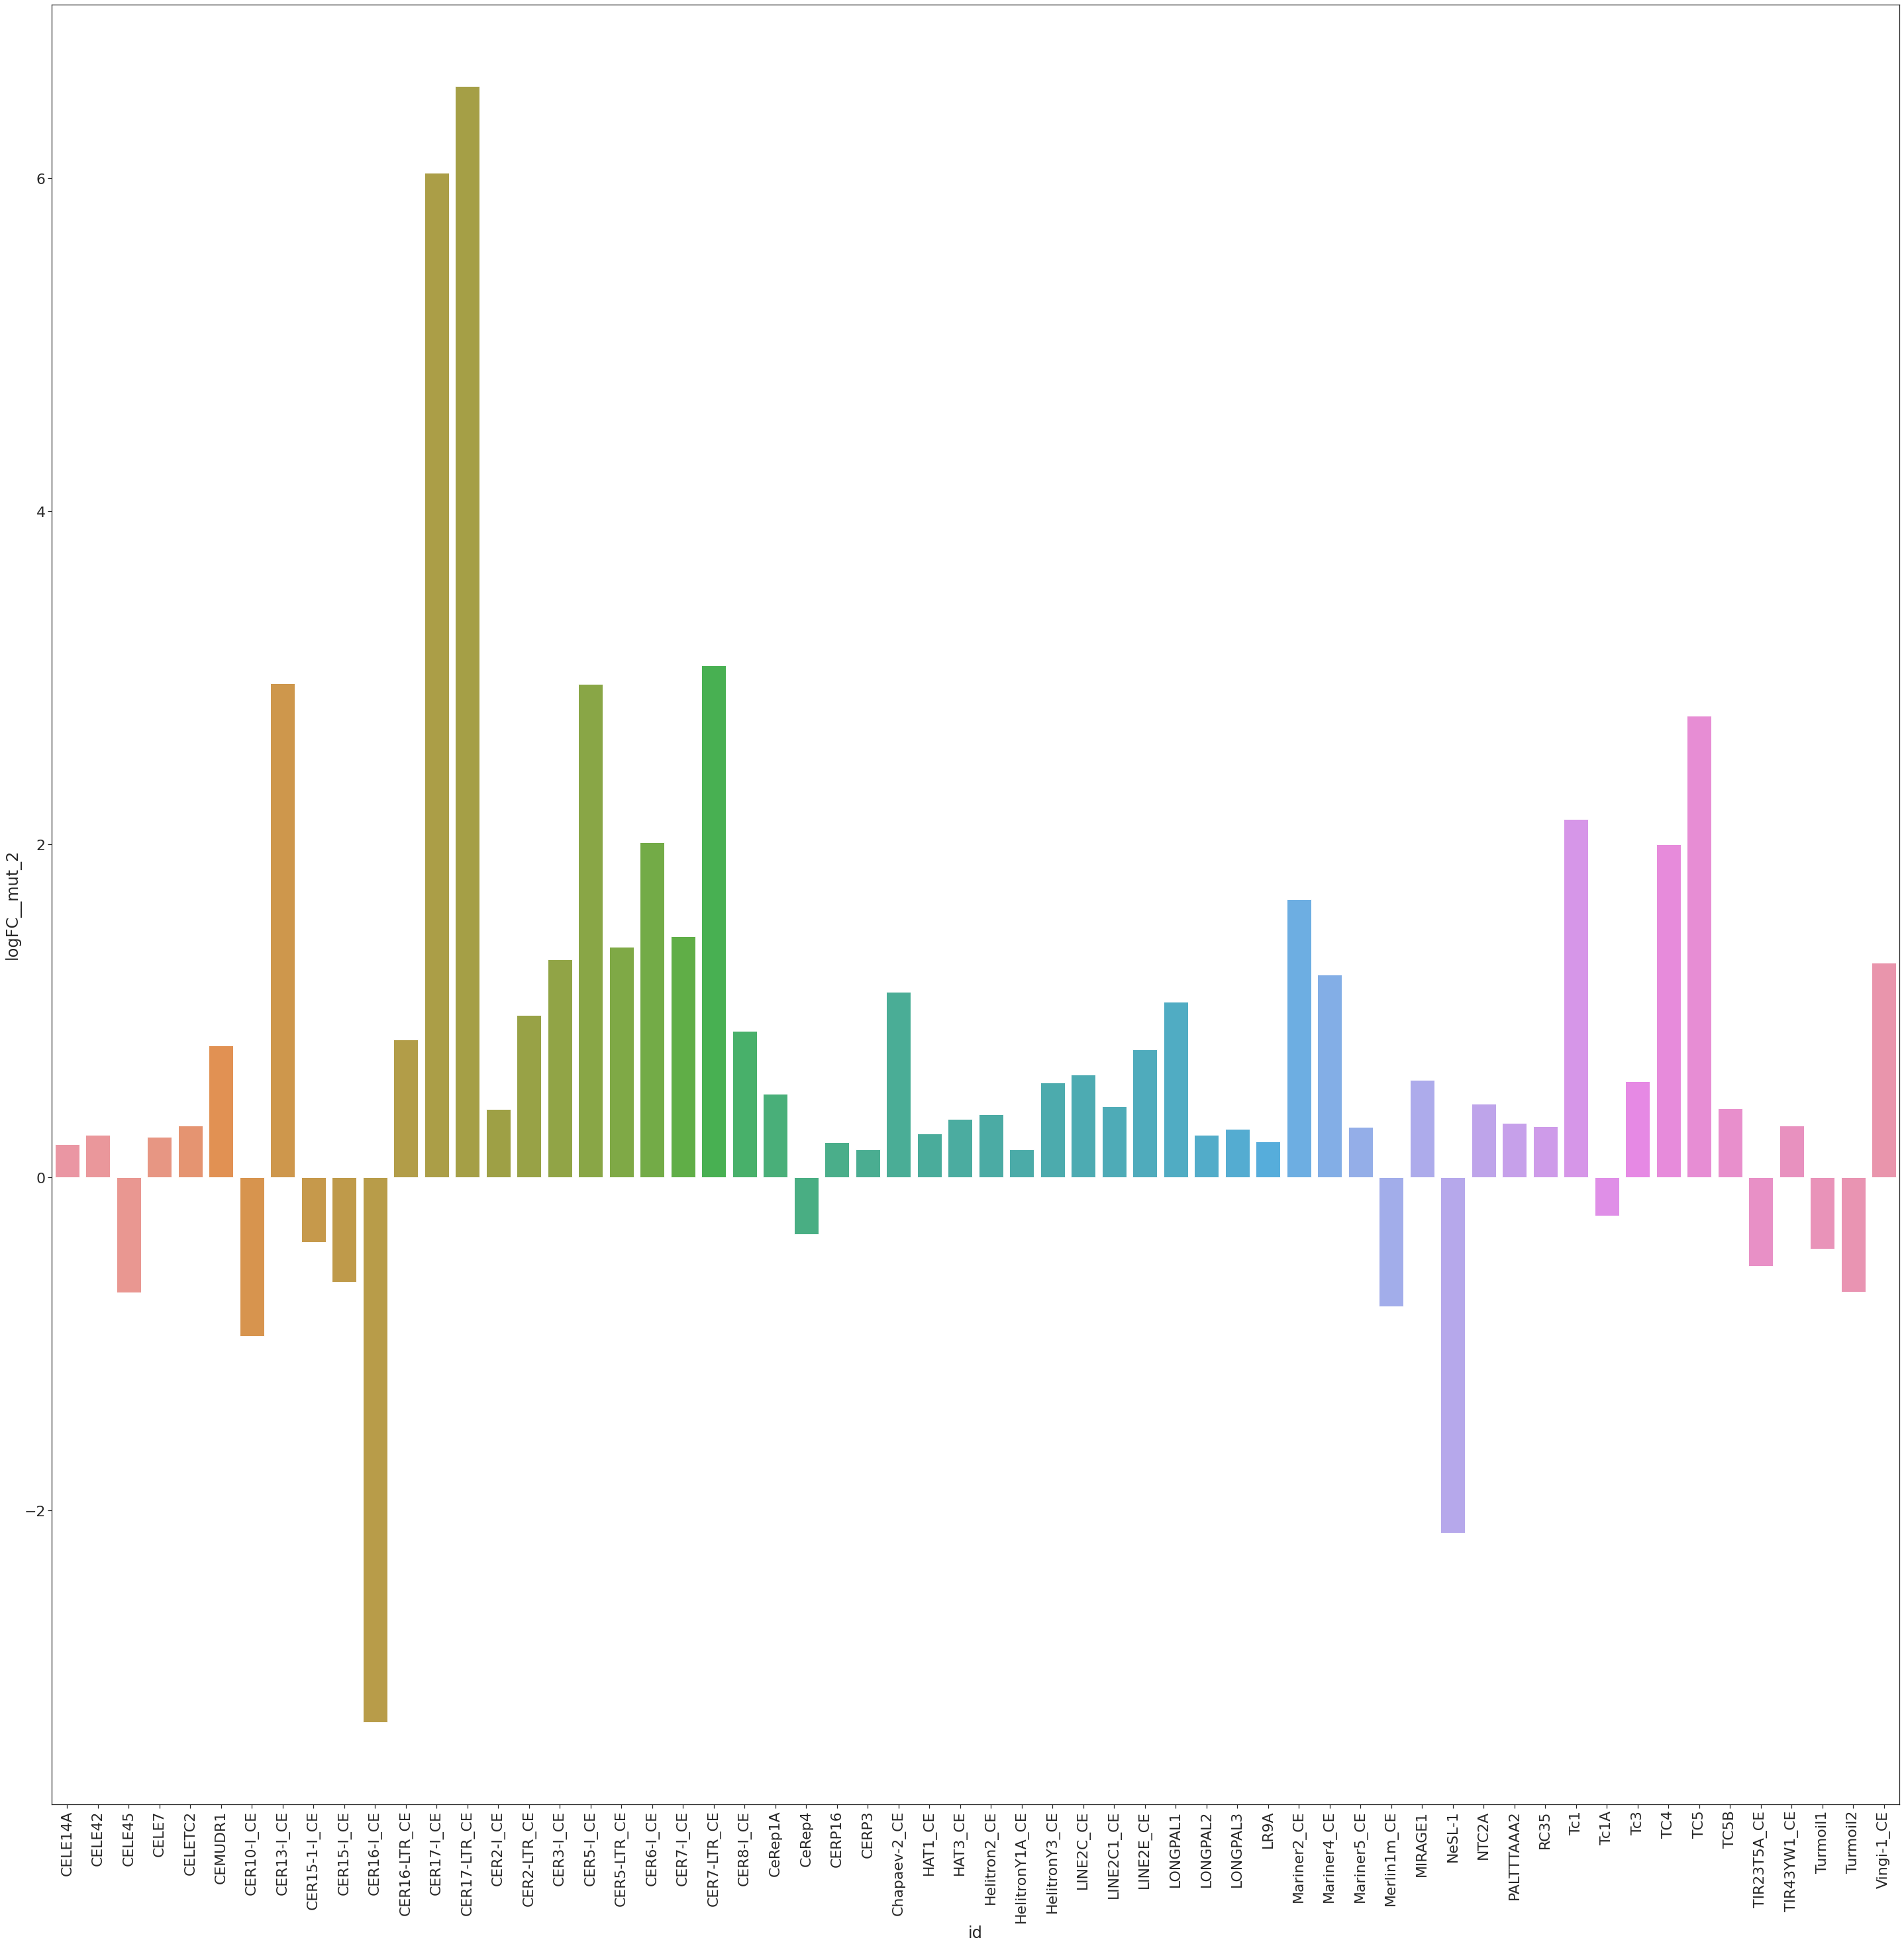

In [18]:
mut_2_rep_name = pd.read_csv(mut_2_rep_name_path, header=0, sep="\t")
mut_2_rep_name.set_index("id", inplace=True)
mut_2_rep_name.columns = mut_2_rep_name.columns + "__mut_2"
mut_2_rep_name.reset_index(inplace=True)
barplot_repeats(mut_2_rep_name, "__mut_2")

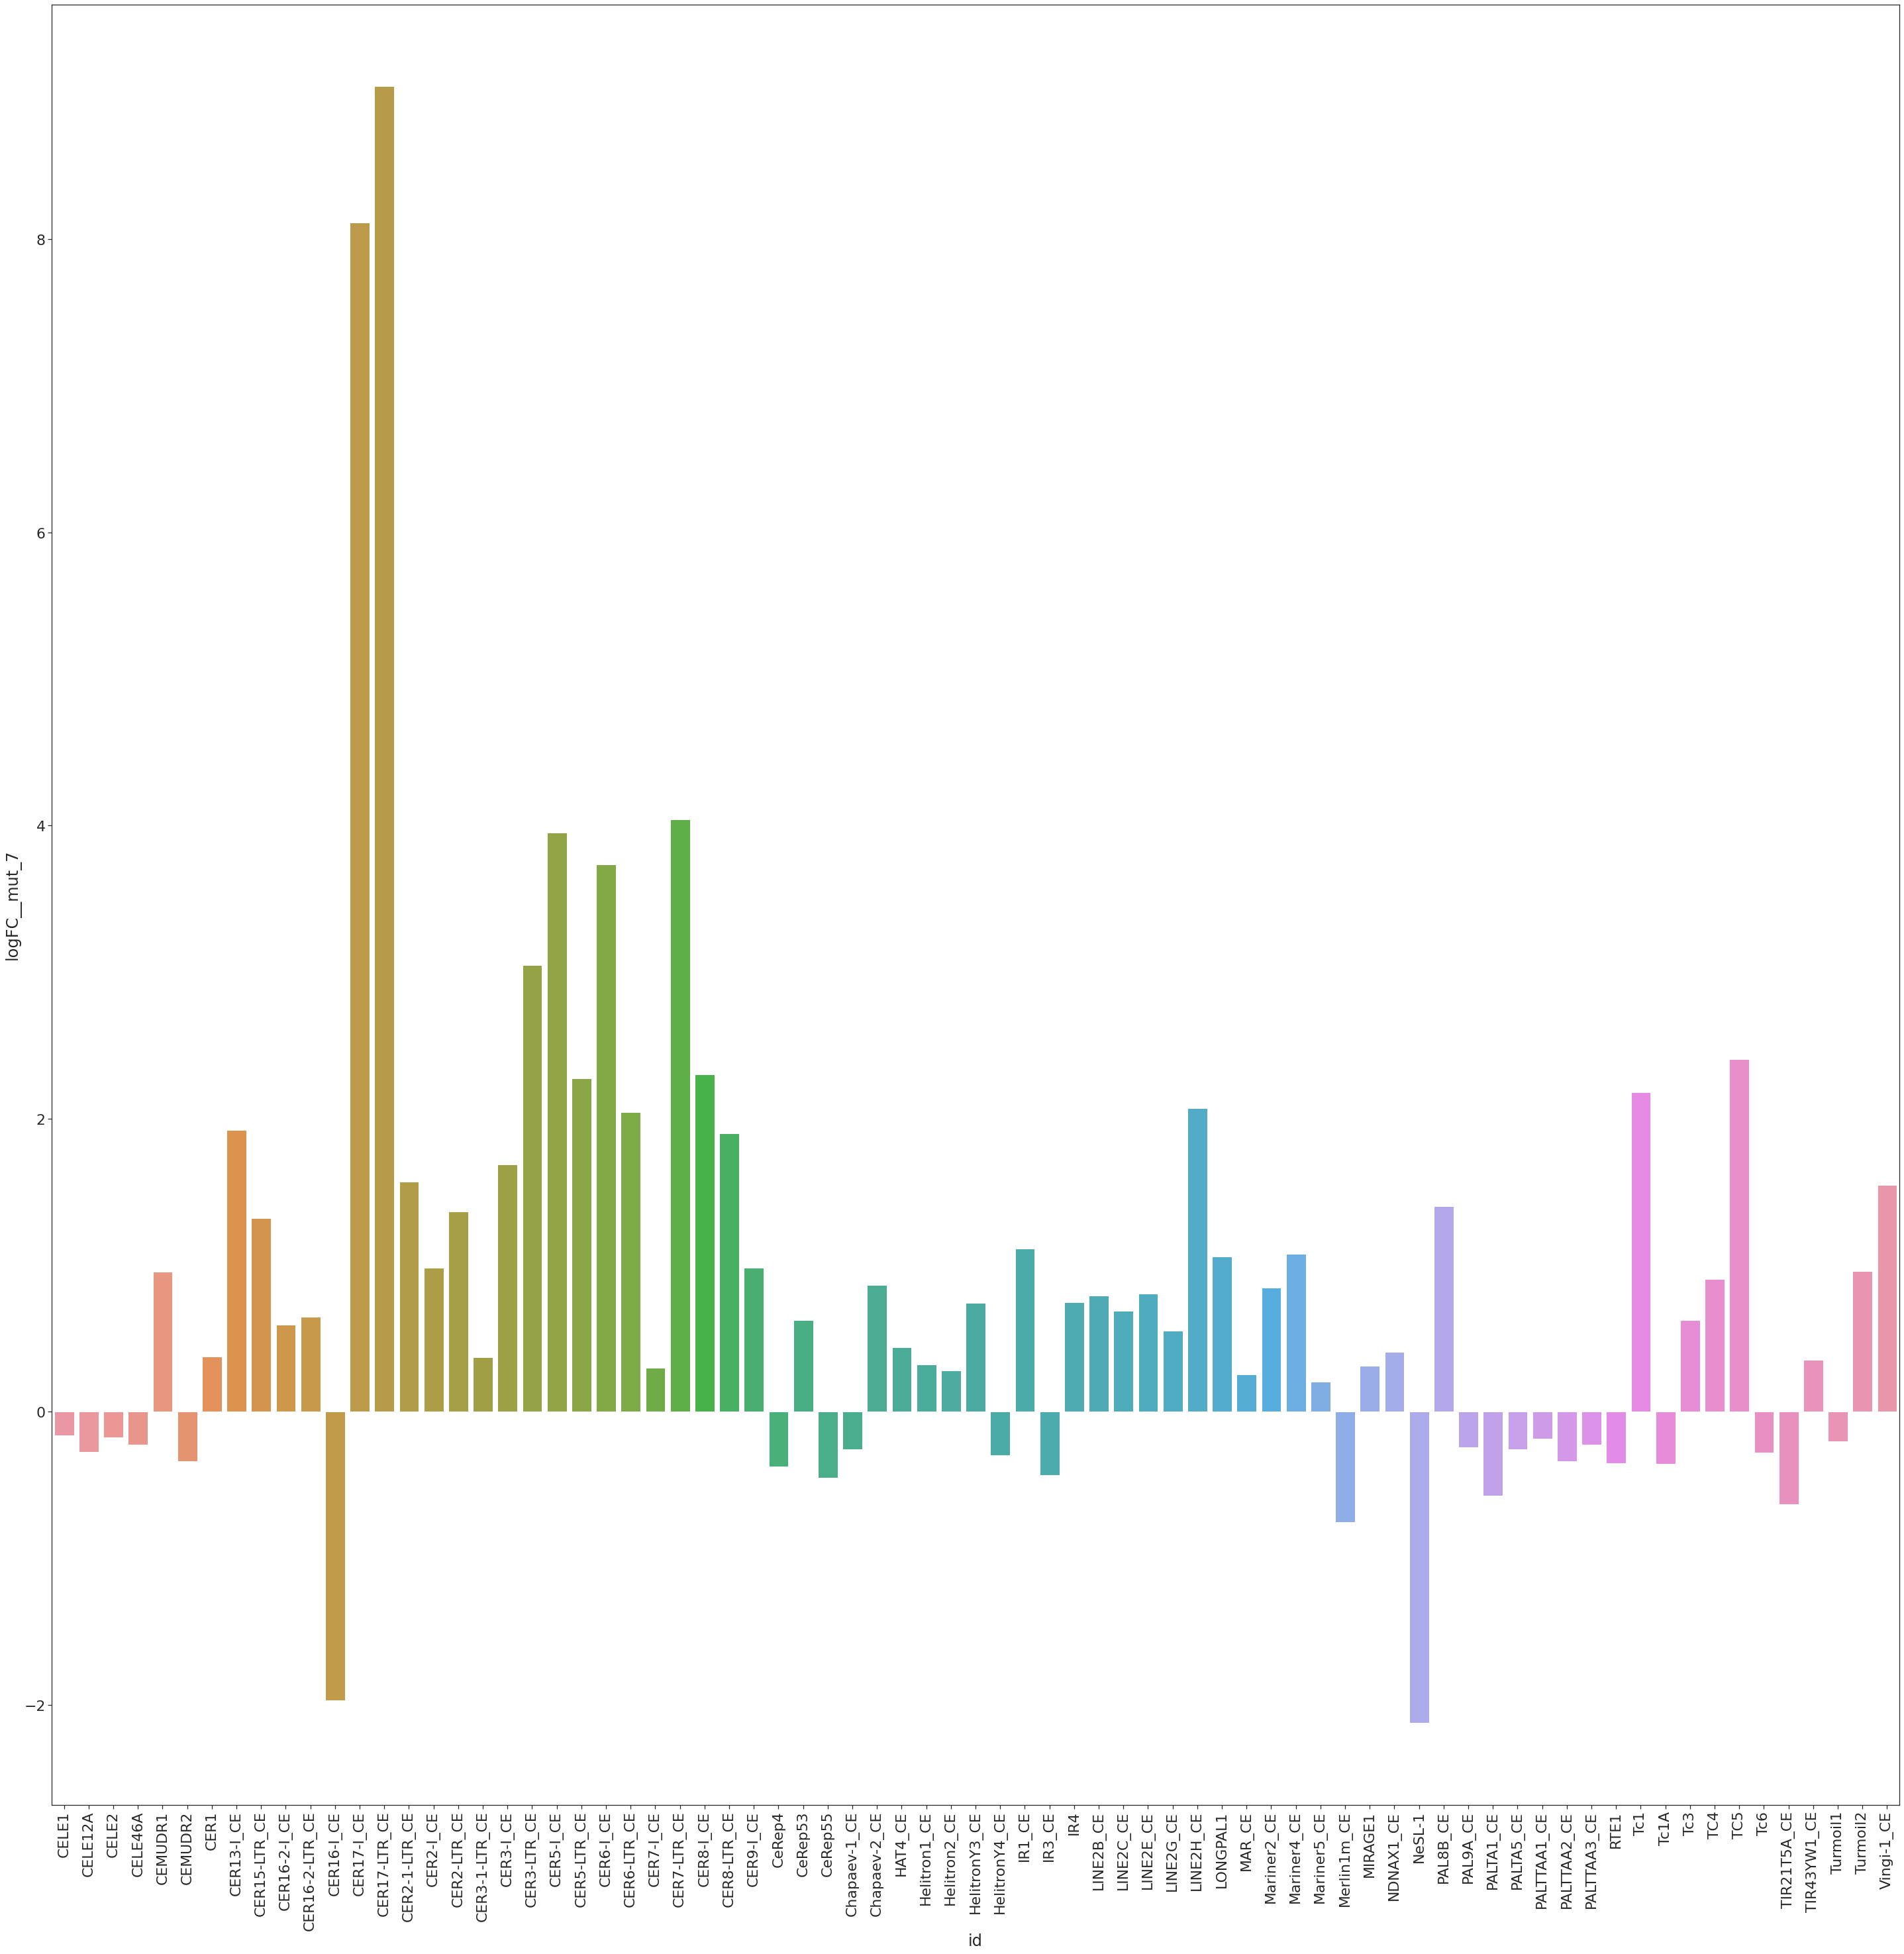

In [19]:
mut_7_rep_name = pd.read_csv(mut_7_rep_name_path, header=0, sep="\t")
mut_7_rep_name.set_index("id", inplace=True)
mut_7_rep_name.columns = mut_7_rep_name.columns + "__mut_7"
mut_7_rep_name.reset_index(inplace=True)
barplot_repeats(mut_7_rep_name, "__mut_7")

# merge single dataframes

In [20]:
dfs = [dpf3_null_rep_name, mut_2_rep_name, mut_7_rep_name]
df_final = reduce(lambda left,right: pd.merge(left,right,on='id', how="outer"), dfs)

In [21]:
df_final_short = df_final[['id', "logFC__dpf3_null", "logFC__mut_2", "logFC__mut_7"]].copy()

In [22]:
df_final_short.head()

,id,logFC__dpf3_null,logFC__mut_2,logFC__mut_7
0,CEMUDR1,-0.264146,0.793168,0.957213
1,CER15-1-I_CE,-0.669112,-0.387850,NaN
2,CER15-I_CE,-0.704610,-0.626887,NaN
3,CER16-LTR_CE,0.704588,0.829470,NaN
4,CER17-I_CE,0.830396,6.032033,8.116064


In [23]:
df_final_short.fillna(0, inplace=True)

In [24]:
df_final_short.head()

,id,logFC__dpf3_null,logFC__mut_2,logFC__mut_7
0,CEMUDR1,-0.264146,0.793168,0.957213
1,CER15-1-I_CE,-0.669112,-0.387850,0.000000
2,CER15-I_CE,-0.704610,-0.626887,0.000000
3,CER16-LTR_CE,0.704588,0.829470,0.000000
4,CER17-I_CE,0.830396,6.032033,8.116064


# merge repeat annotation and signle dataframes

In [25]:
df_final_short_with_annotation = df_final_short.merge(repeats_ucsc_short)
df_final_short_with_annotation.set_index("id", inplace=True)

In [26]:
df_final_short_with_annotation.head()

,logFC__dpf3_null,logFC__mut_2,logFC__mut_7,class,family
id,,,,,
CEMUDR1,-0.264146,0.793168,0.957213,DNA,MULE-MuDR
CER15-1-I_CE,-0.669112,-0.387850,0.000000,LTR,Pao
CER15-I_CE,-0.704610,-0.626887,0.000000,LTR,Pao
CER16-LTR_CE,0.704588,0.829470,0.000000,LTR,Pao
CER17-I_CE,0.830396,6.032033,8.116064,LTR,Pao


In [27]:
len(df_final_short_with_annotation)

102

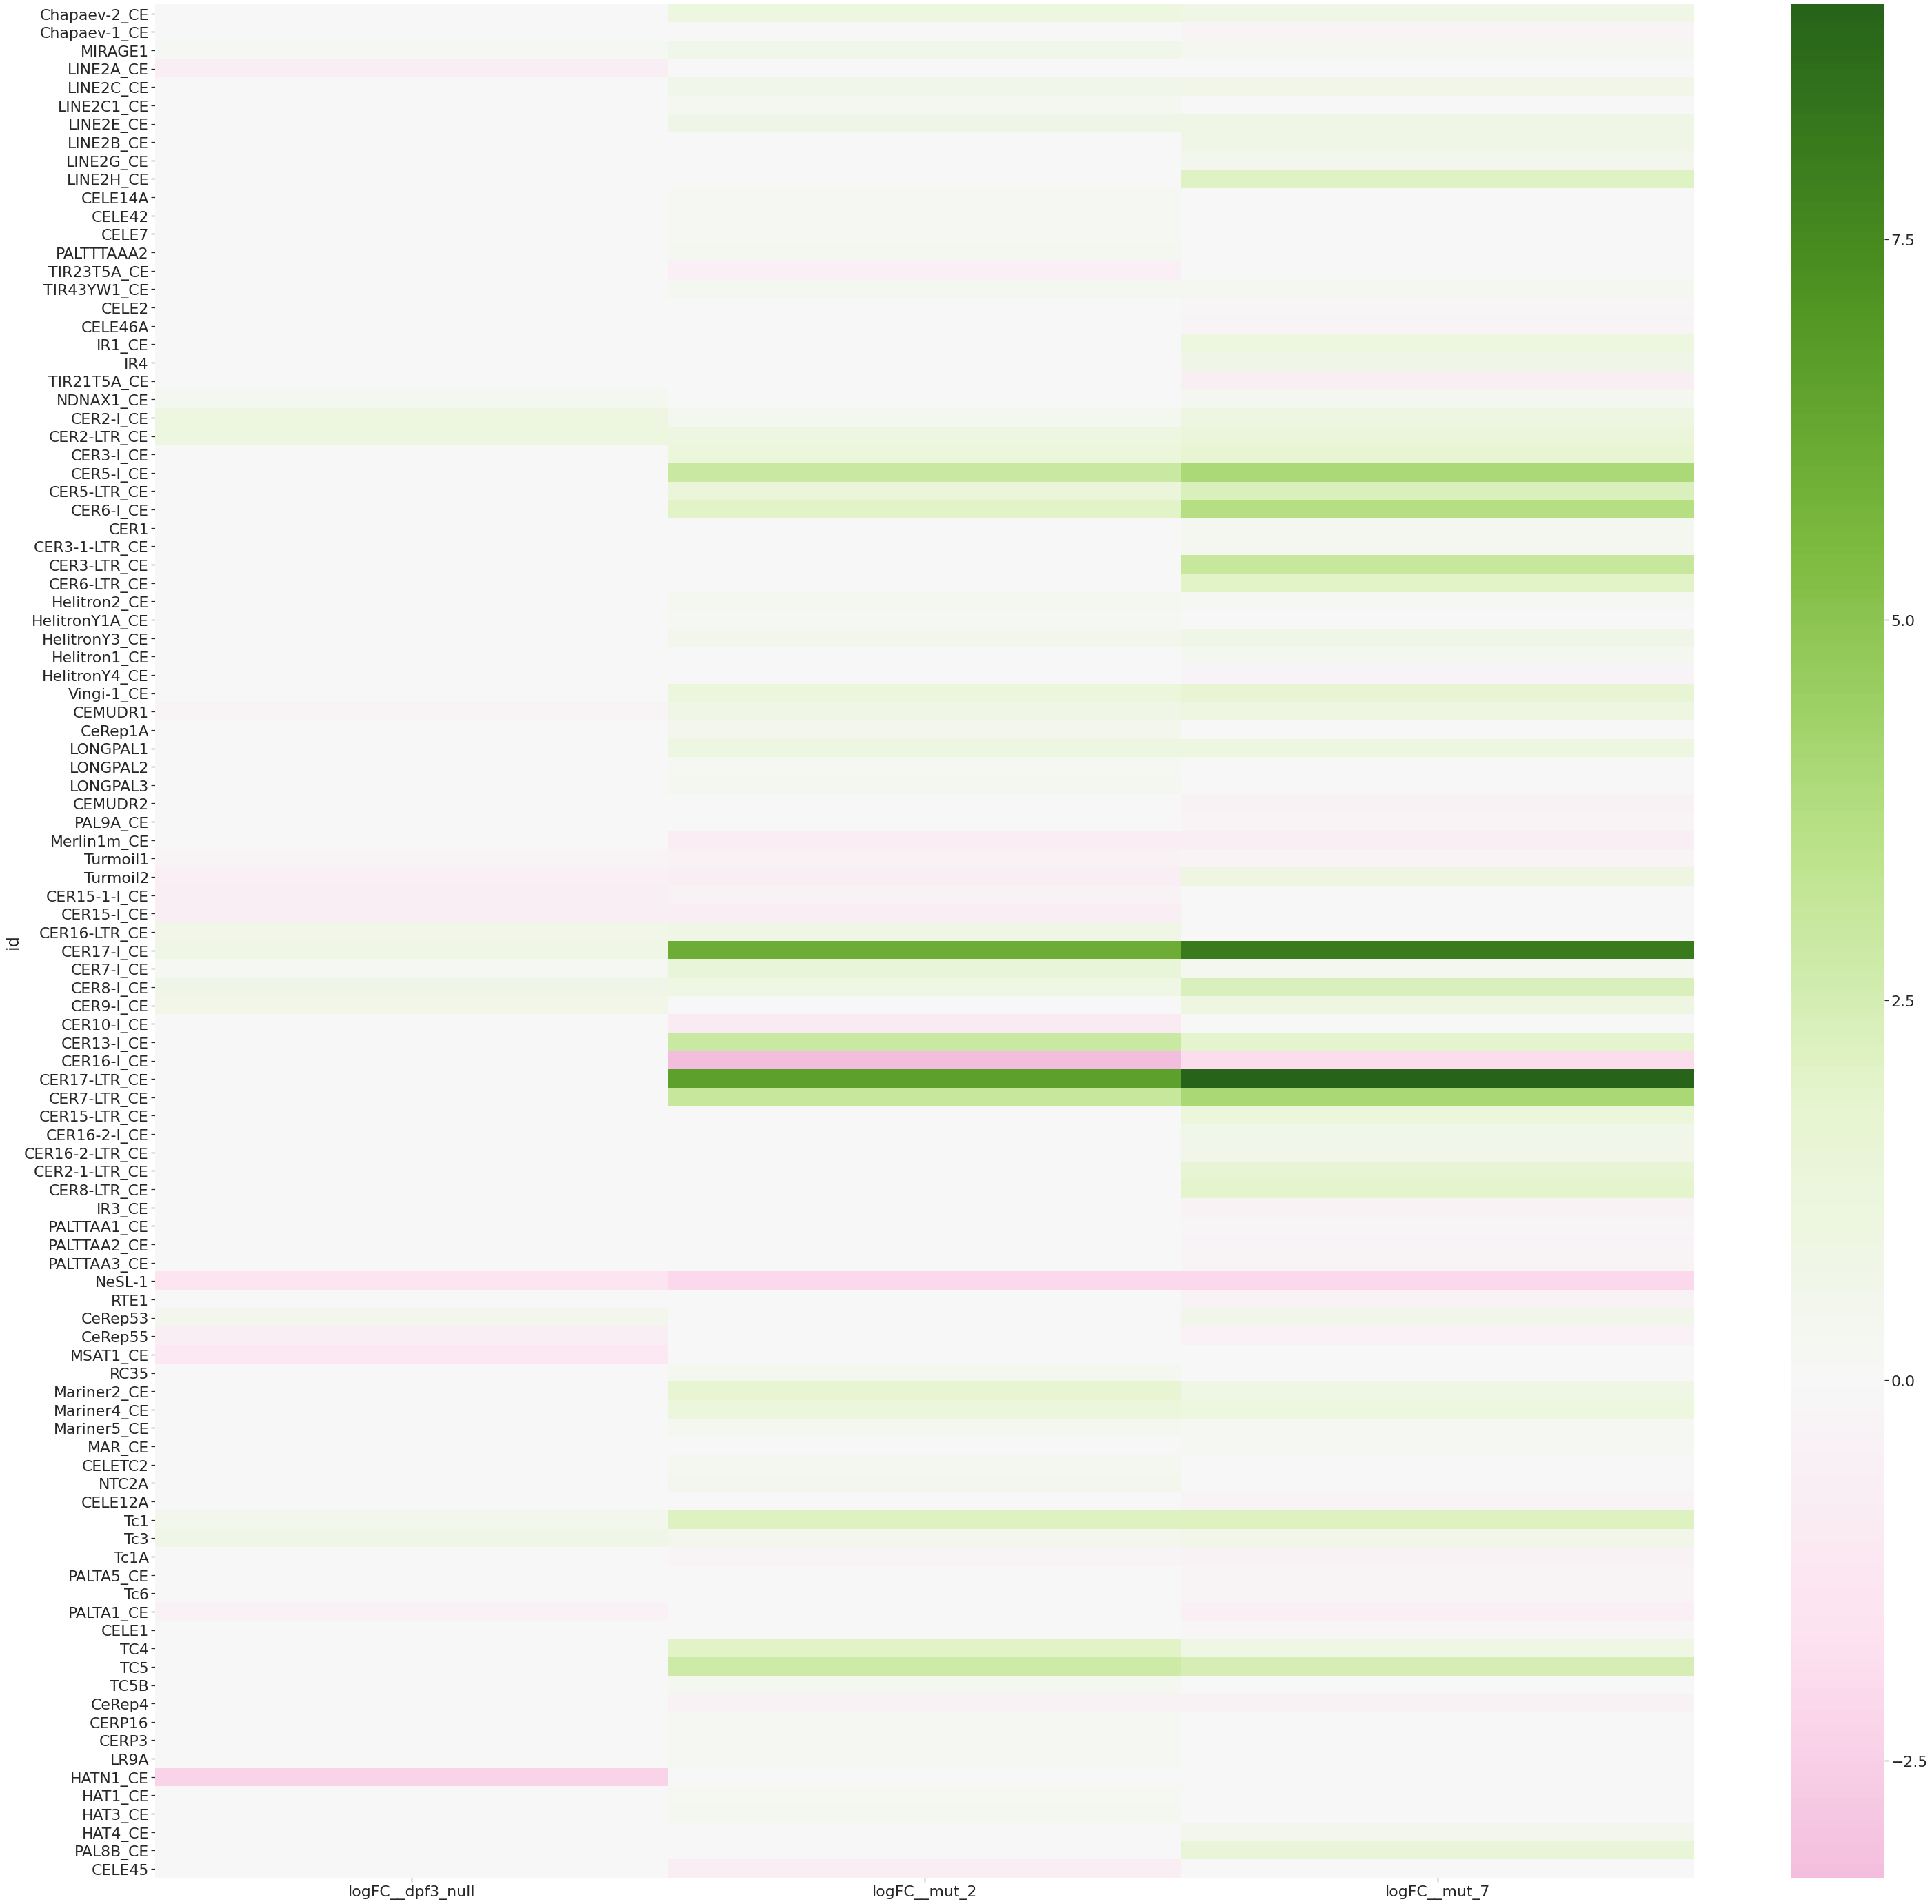

In [28]:
sns.heatmap(df_final_short_with_annotation.sort_values(["family", "class"])[["logFC__dpf3_null", "logFC__mut_2", "logFC__mut_7"]], cmap="PiYG", center=0)
plt.savefig("heatmap.pdf")